# 워드클라우드

## 1. 데이터 가져오기

In [1]:
f = open('[박경리]_토지1.txt', 'r', encoding = 'cp949')
story = f.read()
f.close()

In [2]:
print(type(story))
# print(story)

<class 'str'>


## 2. 워드클라우드 그리기

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(
        font_path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundL.ttf',
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height
        ).generate(data)
    print(wordcloud.words_)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

{'용이는': 1.0, '하고': 0.9940476190476191, '같은': 0.9642857142857143, '있는': 0.9583333333333334, '없는': 0.8630952380952381, '내가': 0.8154761904761905, '평산은': 0.7857142857142857, '그는': 0.7202380952380952, '했다': 0.7083333333333334, '그러나': 0.6845238095238095, '다시': 0.6488095238095238, '하는': 0.6369047619047619, '말을': 0.6309523809523809, '어디': 0.6130952380952381, '것을': 0.5952380952380952, '그런': 0.5714285714285714, '용이': 0.5654761904761905, '가서': 0.5476190476190477, '것도': 0.5357142857142857, '하며': 0.5297619047619048, '그래': 0.5059523809523809, '강청댁은': 0.5059523809523809, '말했다': 0.5, '일이': 0.5, '말이': 0.4880952380952381, '눈을': 0.47023809523809523, '없다': 0.4583333333333333, '눈이': 0.4583333333333333, '없이': 0.44642857142857145, '없었다': 0.44047619047619047, '그리': 0.42857142857142855, '치수는': 0.42857142857142855, '하나': 0.4226190476190476, '무슨': 0.4226190476190476, '얼굴을': 0.4166666666666667, '누가': 0.4166666666666667, '나는': 0.4107142857142857, '보고': 0.40476190476190477, '있다': 0.39285714285714285, '않았다': 0.39285

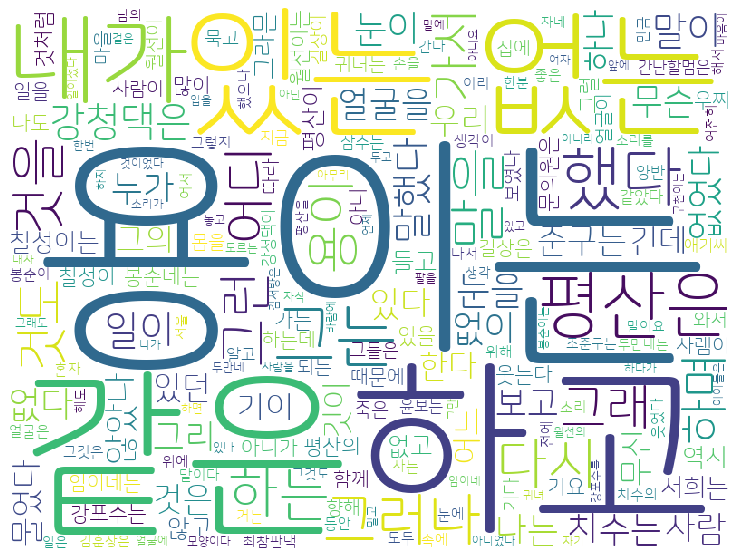

In [4]:
stopwords_kr = ['있었다', '것이다']
displayWordCloud(story)

## 3. 명사 추출(soynlp)

In [5]:
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract([story]) # list of str like

used default noun predictor; Sejong corpus based logistic predictor
C:/ProgramData/Anaconda3/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (65140, 27577, 33963)
predicting noun score was done                                        
before postprocessing 10178
_noun_scores_ 2236
checking hardrules ... done / 2236떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 1383
extracted 4 compounds from eojeolss ... 2000 / 2675

In [6]:
print(type(nouns))
# print(nouns)

<class 'dict'>


{'울타리': 1.0, '아침': 1.0, '바람': 1.0, '마음': 1.0, '사랑': 1.0, '모두': 1.0, '서서방': 1.0, '세상': 1.0, '제집': 1.0, '자식': 1.0, '곡식': 1.0, '자리': 1.0, '얼굴': 1.0, '구천': 1.0, '별당': 1.0, '날씨': 1.0, '이놈': 1.0, '사냥': 1.0, '아씨': 1.0, '그년': 1.0, '참말': 1.0, '봉순어매': 1.0, '조상': 1.0, '사램': 1.0, '내일': 1.0, '자네': 1.0, '할일': 1.0, '연곡사': 1.0, '노스님': 1.0, '그기': 1.0, '친정': 1.0, '이서방': 1.0, '까닭인지': 0.5, '긁적긁적': 0.5, '고래고래': 0.5, '참판어른': 0.5, '어둠': 0.5, '발소리': 0.5, '인사': 0.5, '마을': 0.5, '마을길': 0.5, '어른': 0.5, '어른들': 0.5, '중천': 0.5, '무렵': 0.5, '차례': 0.5, '이웃': 0.5, '음식': 0.5, '한나절': 0.5, '이때': 0.5, '타작': 0.5, '타작마당': 0.5, '노인들': 0.5, '채비': 0.5, '아무래': 0.5, '수밖': 0.5, '식구': 0.5, '자신': 0.5, '고개': 0.5, '황금': 0.5, '황금빛': 0.5, '물결': 0.5, '들판': 0.5, '풀밭': 0.5, '출입': 0.5, '남녀': 0.5, '강아지': 0.5, '돼지': 0.5, '새들': 0.5, '장단': 0.5, '꽹과리': 0.5, '거리': 0.5, '최참판댁': 0.5, '틀림': 0.5, '허리': 0.5, '허리끈': 0.5, '하루': 0.5, '근심': 0.5, '늙은이들': 0.5, '뒷간': 0.5, '젊은': 0.5, '벌써': 0.5, '읍내': 0.5, '마리': 0.5, '씨름판': 0.5, '햇빛': 0.5, '방문': 0.5, '장지': 0.5,

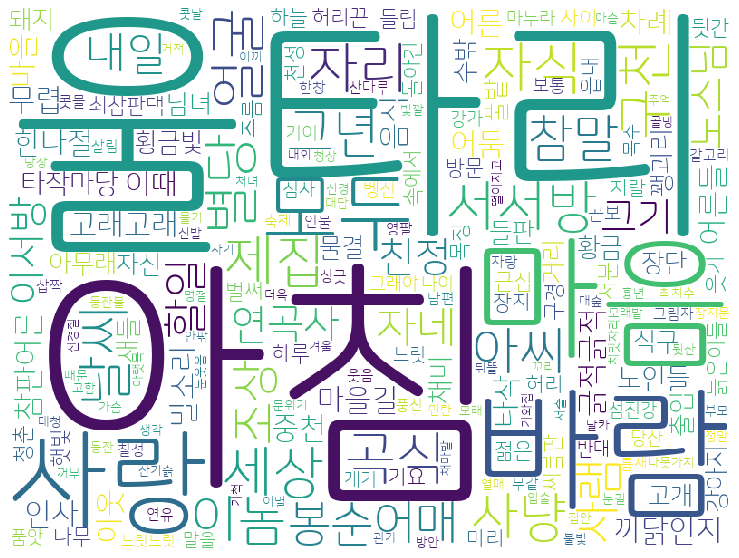

In [7]:
# 추출된 명사 찍기
displayWordCloud(' '.join(nouns))    # 딕셔너리 형태 -> 문자열 형태

## 3. 명사 추출(konlpy)

In [9]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [10]:
kkma = Kkma()

In [11]:
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [12]:
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [13]:
pprint(kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


In [14]:
from konlpy.tag import Hannanum

In [15]:
hannanum = Hannanum()

In [16]:
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))

['다람쥐', '쳇바퀴', '타고파']


In [17]:
data = kkma.nouns(story)

{'하믄': 1.0, '가지': 1.0, '우리': 1.0, '하노': 1.0, '이래': 0.6666666666666666, '한나절': 0.6666666666666666, '섬진강': 0.6666666666666666, '누군가': 0.6666666666666666, '자기': 0.6666666666666666, '구천': 0.6666666666666666, '하나': 0.6666666666666666, '행랑': 0.6666666666666666, '다섯': 0.6666666666666666, '이번': 0.6666666666666666, '중놈': 0.6666666666666666, '삼수': 0.6666666666666666, '만큼': 0.6666666666666666, '나가도': 0.6666666666666666, '머리': 0.6666666666666666, '천길': 0.6666666666666666, '무엇': 0.6666666666666666, '천리': 0.6666666666666666, '삼월': 0.6666666666666666, '시믄': 0.6666666666666666, '오믄': 0.6666666666666666, '대로': 0.6666666666666666, '분명': 0.6666666666666666, '구겡': 0.6666666666666666, '일곱': 0.6666666666666666, '주믄': 0.6666666666666666, '보녀': 0.6666666666666666, '마련': 0.6666666666666666, '가마': 0.6666666666666666, '보믄': 0.6666666666666666, '조상': 0.6666666666666666, '꿈벅꿈벅': 0.6666666666666666, '임자': 0.6666666666666666, '천지': 0.6666666666666666, '비렁땅': 0.6666666666666666, '개값': 0.6666666666666666, '누마': 0.6666

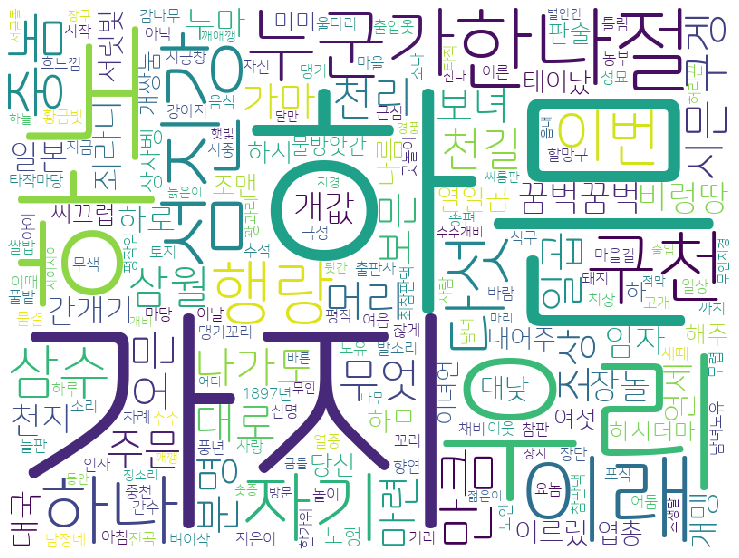

In [18]:
displayWordCloud(' '.join(data))

## 4. 이미지 파일 위에 워드클라우드

In [19]:
from PIL import Image
import numpy

In [20]:
img = Image.open('cloud.png')
img_array = numpy.array(img)
print(type(img_array))
img_array

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

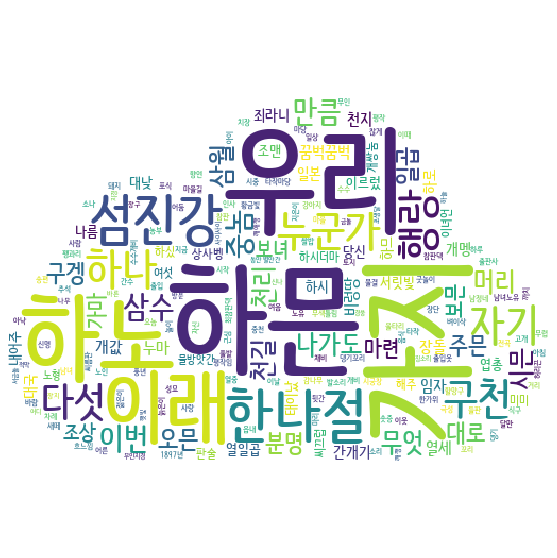

In [24]:
wordcloud = WordCloud(font_path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenB.ttf',
                     background_color = 'white',
                     mask = img_array,
                     width = 800, height = 600
                     ).generate(' '.join(data))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 이미지로 결과 저장
wordcloud.to_file('simple.png')